# Import Statements

In [1]:
%run "C:\Users\zahid\PycharmProjects\AutoTrader\Prototype Python Connector\dwx_tick_data_io".py
%load_ext autoreload
%autoreload
%matplotlib notebook

# Historical Data Retrieval

In [8]:
htdExtractor = DWX_TICK_DATA_IO(
    _path=r'C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original')

output = htdExtractor._get_symbol_as_dataframe_(
    _symbol='GBPUSD', _precision='tick', _date='2019-06-03')

[INFO] Finding symbol files.. please wait..
[INFO] Processing BID (24) / ASK (24) files.. please wait..
BIDS: 24 / 24 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_BID_2019-06-03_23.log.gz24
<class 'pandas.core.frame.DataFrame'>

ASKS: 24 / 24 - C:\Users\zahid\OneDrive\Historical Tick Data\Historical Tick Data Original/GBPUSD/GBPUSD_ASK_2019-06-03_23.log.gz

In [9]:
output.rename(columns={'ask_price':'Ask','bid_price':'Bid'},inplace=True)
output.index.rename('Time',inplace=True)
# output.index = output.index.floor('S') # Truncate precision to seconds (MT4 does not provide millisecond precision)
output.index = pd.to_datetime(output.index,format="%Y.%m.%d %H:%M:%S:%f")
output

,Ask,Bid
Time,,
2019-06-03 00:00:00.129,1.26395,1.26387
2019-06-03 00:00:00.314,1.26396,1.26387
2019-06-03 00:00:00.330,1.26395,1.26387
2019-06-03 00:00:00.379,1.26395,1.26386
2019-06-03 00:00:00.531,1.26395,1.26388
2019-06-03 00:00:00.670,1.26396,1.26388
2019-06-03 00:00:00.687,1.26395,1.26388
2019-06-03 00:00:00.688,1.26395,1.26387
2019-06-03 00:00:00.757,1.26395,1.26386


# Comparing the historical with MT4

In [96]:
# Comparison set
historicalSet = output

# MT4 Set
MT4Set = pd.read_hdf('testTickData.h5')
MT4Set = MT4Set.loc[:,'Bid':'Ask']

<IPython.core.display.Javascript object>


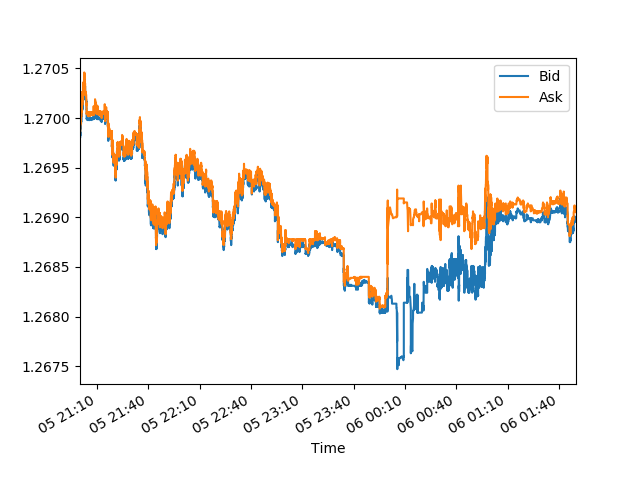

<IPython.core.display.Javascript object>


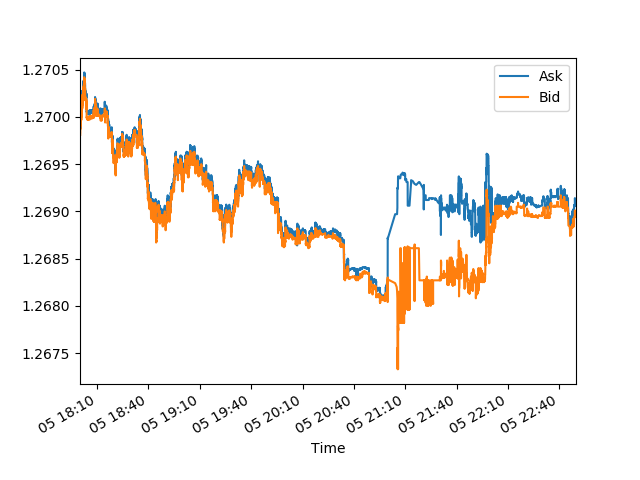

                             Bid      Ask
Time                                     
2019-06-05 21:00:00.440  1.26990  1.26995
2019-06-05 21:00:00.155  1.26990  1.26996
2019-06-05 21:00:00.229  1.26990  1.26994
2019-06-05 21:00:00.257  1.26989  1.26995
2019-06-05 21:00:00.309  1.26987  1.26992
2019-06-05 21:00:00.316  1.26987  1.26989
2019-06-05 21:00:00.323  1.26984  1.26989
2019-06-05 21:00:00.329  1.26984  1.26984
2019-06-05 21:00:00.337  1.26983  1.26984
2019-06-05 21:00:00.345  1.26983  1.26985
2019-06-05 21:00:00.353  1.26983  1.26989
2019-06-05 21:00:00.359  1.26984  1.26989
2019-06-05 21:00:00.372  1.26983  1.26989
2019-06-05 21:00:00.486  1.26983  1.26988
2019-06-05 21:00:00.544  1.26983  1.26987
2019-06-05 21:00:00.557  1.26982  1.26987
2019-06-05 21:00:00.563  1.26981  1.26987
2019-06-05 21:00:00.583  1.26982  1.26987
2019-06-05 21:00:00.796  1.26981  1.26987
2019-06-05 21:00:01.755  1.26981  1.26986
2019-06-05 21:00:01.878  1.26981  1.26985
2019-06-05 21:00:02.830  1.26980  

In [97]:
MT4Set['2019-06-05 21:00:00':'2019-06-06 01:50:00'].plot()
historicalSet['2019-06-05 18:00:00':'2019-06-05 22:50:00'].plot()
print(MT4Set['2019-06-05 21:00:00':'2019-06-06 01:50:00'])
print(historicalSet['2019-06-05 18:00:00':'2019-06-05 22:50:00'])

#Check where the missed ticks are isolated to:
MT4Set = MT4Set['2019-06-05 21:00:00':'2019-06-06 01:50:00']
historicalSet = historicalSet['2019-06-05 18:00:00':'2019-06-05 22:50:00']

In [98]:
MT4TickSpread = MT4Set.loc[:,'Ask'] - MT4Set.loc[:,'Bid']
MT4TickSpread.rename("Spread",inplace=True)
print(MT4TickSpread.shape)
historicalTickSpread = historicalSet.loc[:,'Ask'] - historicalSet.loc[:,'Bid']
historicalTickSpread.rename("Spread",inplace=True)
historicalTickSpread.index = historicalTickSpread.index + pd.Timedelta('3 hours')
historicalSet.index = historicalSet.index + pd.Timedelta('3 hours')
print(historicalTickSpread)
print(historicalSet)
print(MT4TickSpread)

(26821,)
Time
2019-06-05 21:00:00.145    0.00007
2019-06-05 21:00:00.202    0.00008
2019-06-05 21:00:00.230    0.00006
2019-06-05 21:00:00.304    0.00002
2019-06-05 21:00:00.330    0.00001
2019-06-05 21:00:00.339   -0.00001
2019-06-05 21:00:00.348    0.00003
2019-06-05 21:00:00.351    0.00004
2019-06-05 21:00:00.359    0.00005
2019-06-05 21:00:00.402    0.00004
2019-06-05 21:00:00.448    0.00006
2019-06-05 21:00:00.601    0.00007
2019-06-05 21:00:00.648    0.00008
2019-06-05 21:00:00.850    0.00007
2019-06-05 21:00:00.874    0.00008
2019-06-05 21:00:00.958    0.00007
2019-06-05 21:00:00.978    0.00008
2019-06-05 21:00:01.754    0.00006
2019-06-05 21:00:01.855    0.00006
2019-06-05 21:00:01.881    0.00007
2019-06-05 21:00:03.892    0.00008
2019-06-05 21:00:03.966    0.00006
2019-06-05 21:00:04.050    0.00007
2019-06-05 21:00:04.092    0.00006
2019-06-05 21:00:07.711    0.00007
2019-06-05 21:00:07.743    0.00006
2019-06-05 21:00:07.776    0.00005
2019-06-05 21:00:07.791    0.00006
2019-0

In [99]:
MT4TickWSpread = pd.concat([MT4Set,MT4TickSpread],axis=1)
historicalTickWSpread = pd.concat([historicalSet,historicalTickSpread],axis=1)
tickLimit = 0.0001
hShapeUnderLimit = historicalTickWSpread[historicalTickWSpread['Spread']<tickLimit].shape
MT4ShapeUnderLimit = MT4TickWSpread[MT4TickWSpread['Spread']<tickLimit].shape
print(hShapeUnderLimit)
print(MT4ShapeUnderLimit)
print(hShapeUnderLimit[0] - MT4ShapeUnderLimit[0])

(22277, 3)
(21335, 3)
942


In [100]:
print(historicalTickWSpread)

                             Ask      Bid   Spread
Time                                              
2019-06-05 21:00:00.145  1.26996  1.26989  0.00007
2019-06-05 21:00:00.202  1.26997  1.26989  0.00008
2019-06-05 21:00:00.230  1.26995  1.26989  0.00006
2019-06-05 21:00:00.304  1.26991  1.26989  0.00002
2019-06-05 21:00:00.330  1.26990  1.26989  0.00001
2019-06-05 21:00:00.339  1.26988  1.26989 -0.00001
2019-06-05 21:00:00.348  1.26988  1.26985  0.00003
2019-06-05 21:00:00.351  1.26989  1.26985  0.00004
2019-06-05 21:00:00.359  1.26990  1.26985  0.00005
2019-06-05 21:00:00.402  1.26990  1.26986  0.00004
2019-06-05 21:00:00.448  1.26990  1.26984  0.00006
2019-06-05 21:00:00.601  1.26990  1.26983  0.00007
2019-06-05 21:00:00.648  1.26990  1.26982  0.00008
2019-06-05 21:00:00.850  1.26990  1.26983  0.00007
2019-06-05 21:00:00.874  1.26990  1.26982  0.00008
2019-06-05 21:00:00.958  1.26989  1.26982  0.00007
2019-06-05 21:00:00.978  1.26989  1.26981  0.00008
2019-06-05 21:00:01.754  1.2698

<bound method DataFrame.to_string of                              Bid      Ask   Spread
Time                                              
2019-06-06 00:59:52.407  1.26876  1.26923  0.00047
2019-06-06 00:59:52.415  1.26875  1.26923  0.00048
2019-06-06 00:59:52.422  1.26878  1.26923  0.00045
2019-06-06 00:59:52.469  1.26879  1.26923  0.00044
2019-06-06 00:59:52.477  1.26878  1.26923  0.00045
2019-06-06 00:59:52.485  1.26880  1.26923  0.00043
2019-06-06 00:59:53.491  1.26881  1.26923  0.00042
2019-06-06 00:59:53.542  1.26880  1.26923  0.00043
2019-06-06 00:59:57.359  1.26880  1.26922  0.00042
2019-06-06 00:59:57.374  1.26880  1.26922  0.00042
2019-06-06 00:59:57.740  1.26879  1.26922  0.00043
2019-06-06 00:59:58.610  1.26880  1.26920  0.00040
2019-06-06 00:59:59.724  1.26879  1.26923  0.00044
2019-06-06 00:59:59.738  1.26879  1.26920  0.00041
2019-06-06 00:59:59.752  1.26880  1.26920  0.00040
2019-06-06 00:59:59.893  1.26879  1.26920  0.00041
2019-06-06 00:59:59.966  1.26879  1.26919  0.

<IPython.core.display.Javascript object>


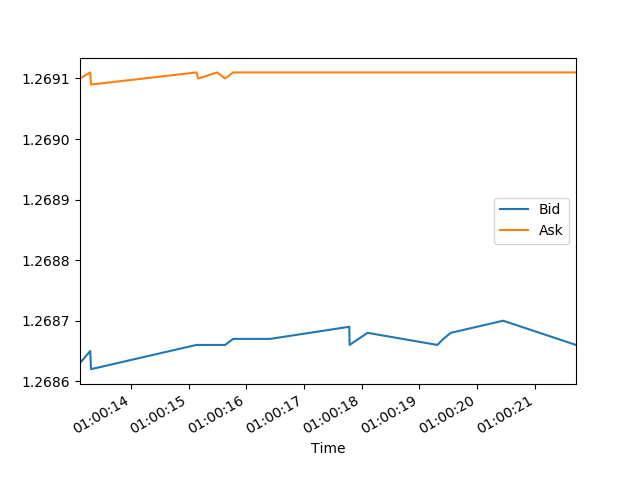

<IPython.core.display.Javascript object>


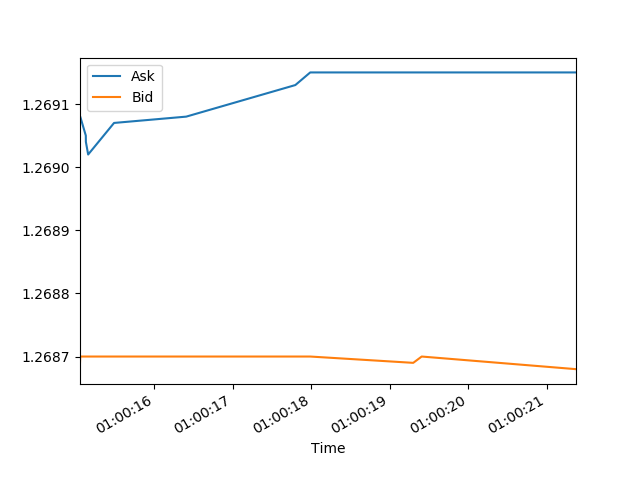

In [123]:
# historicalTickWSpread.merge(MT4TickWSpread,how='inner',on=['Bid','Ask','Spread'],left_index=True)
print(MT4TickWSpread['2019-06-06 00:59:50':'2019-06-06 01:00:02'].to_string)
print(historicalTickWSpread['2019-06-06 00:59:50':'2019-06-06 01:00:02'].to_string)
MT4TickWSpread['2019-06-06 01:00:11':'2019-06-06 01:00:21'].loc[:,'Bid':'Ask'].plot()
historicalTickWSpread['2019-06-06 01:00:11':'2019-06-06 01:00:21'].loc[:,'Ask':'Bid'].plot()